In [40]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
import numpy.polynomial.polynomial as poly

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/MerienMoelker/Final-assignment---CO2-emissions/main/levelized-cost-of-energy.csv')
df.columns = ['Entity', 'Code', 'Year', 'Bioenergy',
       'Geothermal',
       'Offshore wind',
       'Solar photovoltaic',
       'Concentrated solar power',
       'Hydropower',
       'Onshore wind']

0.06824213213262961
0.0018486097571974724
-0.8056225613381045
-0.5206779646503676
0.0708261761620057
-0.11281702245391756


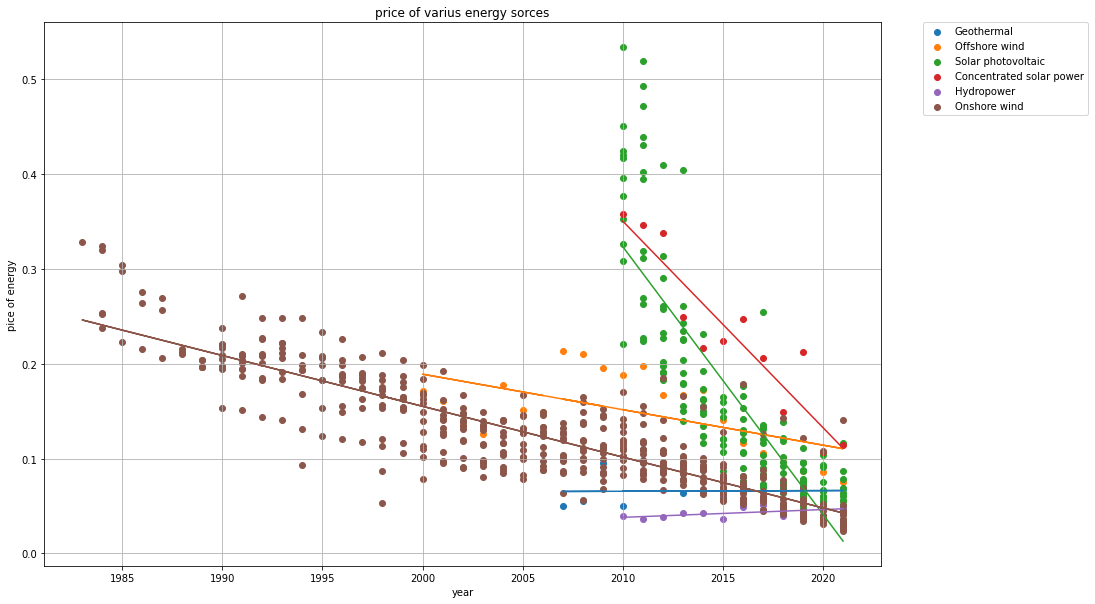

In [42]:
fig, ax = plt.subplots(figsize=(15,10))

energy = []
for i in range(len(df.columns) - 4): 
  ax.scatter(df['Year'], df[df.columns[i+4]], label=df.columns[i+4])
  x = df.dropna(subset=[df.columns[i+4]])['Year']
  y = df.loc[:, df.columns[i+4]].dropna()
  coefs = poly.polyfit(x, y, 1)
  ffit = poly.polyval(x, coefs)
  ax.plot(x, ffit)
  print(poly.polyval(2050, coefs))

ax.set(xlabel='year', ylabel='pice of energy', title='price of varius energy sorces')
ax.grid()
ax.legend(title='enegy sorces')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, 

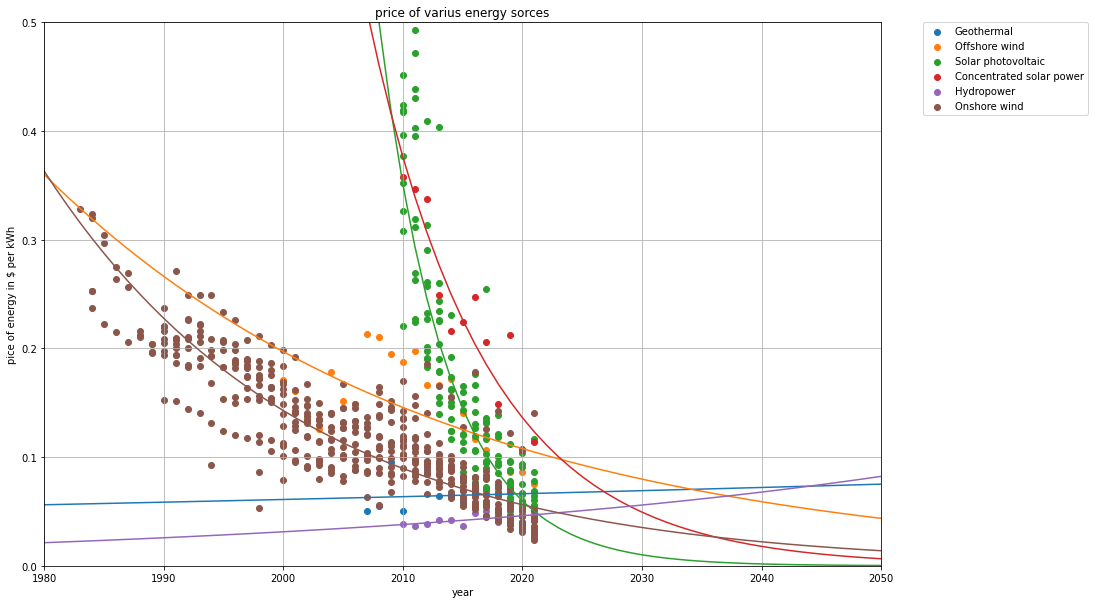

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

years = []
for i  in range(71):
  years.append([1980+i])

transformer = FunctionTransformer(np.log, validate=True)

energy = []
for i in range(len(df.columns) - 4): 
  ax.scatter(df['Year'], df[df.columns[i+4]], label=df.columns[i+4])
  x = df.dropna(subset=[df.columns[i+4]])[['Year']]
  y = df.loc[:, df.columns[i+4]].dropna().array.reshape(-1, 1)
  y_trans = transformer.fit_transform(y)
  reg = LinearRegression()
  results = reg.fit(x,y_trans)
  model = results.predict
  y_fit = model(years)
  ax.plot(years, np.exp(y_fit))
  

ax.set(xlabel='year', ylabel='pice of energy in $ per kWh', title='price of varius energy sorces', xlim=(1980,2050), ylim=(0,.5))
ax.grid()
ax.legend(title='enegy sorces')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [44]:
filter = df['Code'] == 'OWID_WRL'
df = df[filter].sort_values(by='Year', ascending=False).reset_index()

0.05363356618065418
0.06824213213262949
0.0018486097571992488
-0.8521310013763568
-0.5206779646502966
0.07082617616200304
-0.16935599599784368


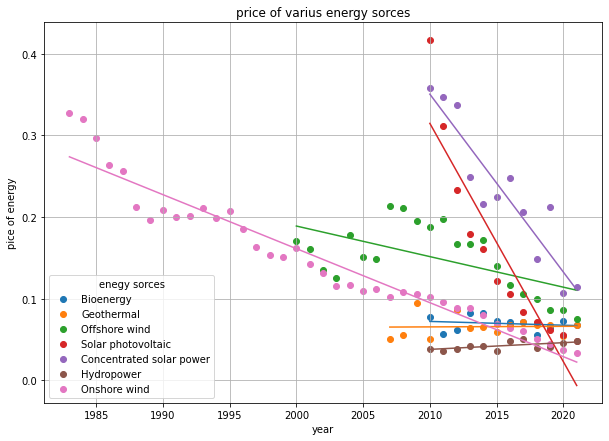

In [45]:
fig, ax = plt.subplots(figsize=(10,7))

energy = []
for i in range(len(df.columns) - 4): 
  ax.scatter(df['Year'], df[df.columns[i+4]], label=df.columns[i+4])
  x = df.dropna(subset=[df.columns[i+4]])['Year']
  y = df.loc[:, df.columns[i+4]].dropna()
  coefs = poly.polyfit(x, y, 1)
  ffit = poly.polyval(x, coefs)
  ax.plot(x, ffit)
  print(poly.polyval(2050, coefs))

ax.set(xlabel='year', ylabel='pice of energy', title='price of varius energy sorces')
ax.grid()
ax.legend(title='enegy sources')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., xlim=(1980,2050), ylim=(0,.5))
plt.savefig('graph1.jpg')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, 

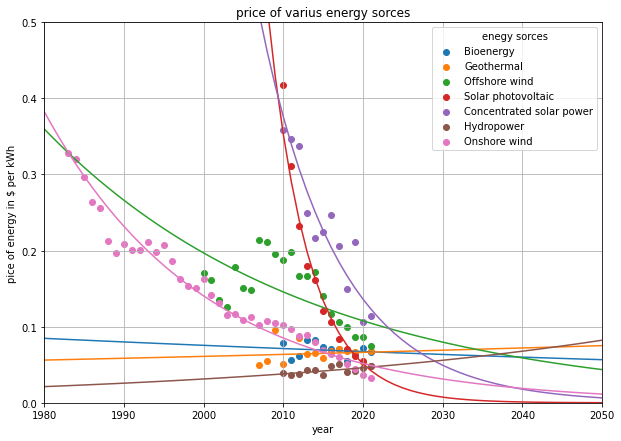

In [46]:
fig, ax = plt.subplots(figsize=(10,7))

years = []
for i  in range(71):
  years.append([1980+i])

transformer = FunctionTransformer(np.log, validate=True)

energy = []
for i in range(len(df.columns) - 4): 
  ax.scatter(df['Year'], df[df.columns[i+4]], label=df.columns[i+4])
  x = df.dropna(subset=[df.columns[i+4]])[['Year']]
  y = df.loc[:, df.columns[i+4]].dropna().array.reshape(-1, 1)
  y_trans = transformer.fit_transform(y)
  reg = LinearRegression()
  results = reg.fit(x,y_trans)
  model = results.predict
  y_fit = model(years)
  ax.plot(years, np.exp(y_fit))


ax.set(xlabel='year', ylabel='pice of energy in $ per kWh', title='price of varius energy sorces', xlim=(1980,2050), ylim=(0,.5))
ax.grid()
ax.legend(title='enegy sources')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('graph2.jpg')